In [1]:
import numpy as np

In [103]:
def calculate_push_force_dynamic(m, g, phi_deg, gamma, D_out, h_max, c, A_inner, A_slant, theta_c_deg, del_h, steps=100):

    phi = np.radians(phi_deg)
    theta_c = np.radians(theta_c_deg)

    Kp = (1 + np.sin(phi)) / (1 - np.sin(phi))
    depths = np.linspace(0, h_max, steps)
    F_push = np.zeros_like(depths)

    for i, h in enumerate(depths):
        W_cylinder = m * g
        A_s = np.pi * D_out * h
        F_friction = (1/2) * np.tan(phi) * (gamma * Kp* h + 2 * c * np.sqrt(Kp)) * A_s
        W_soil = gamma * A_inner * h  # Changes with depth
        F_soil_static = 1/2 * A_slant * np.sin(theta_c) * (gamma * Kp * (2 * h + del_h) + 4 * c * np.sqrt(Kp))
        F_push[i] = - (W_cylinder + W_soil) + F_friction + F_soil_static

    return depths, F_push, Kp

In [104]:
m = 5  # kg (Mass of the cylinder)
g = 9.81  # m/s² (Gravity)
phi_deg = 30  # degrees (Soil internal friction angle)
gamma = 15000  # N/m³ (Unit weight of soil)
D_out = 3.25 * 0.0254 # meters (Outer diameter of cylinder)
h_max = 12 * 0.0254  # meters (Max depth of penetration)
c = 20000 # N/m² (Soil cohesion, e.g., clay)
A_inner = np.pi * ((3 * 0.0254)**2)  # Inner cross-sectional area (m²)

A_slant = ((3.25 * 0.0254)**2 - (3 * 0.0254)**2)
theta_c_deg = 30
del_h = 0.05*0.0254 # Height of chamfer (m)

In [105]:
depths, F_push, Kp = calculate_push_force_dynamic(m, g, phi_deg, gamma, D_out, h_max, c, A_inner, A_slant, theta_c_deg, del_h)
F_push = F_push / 2

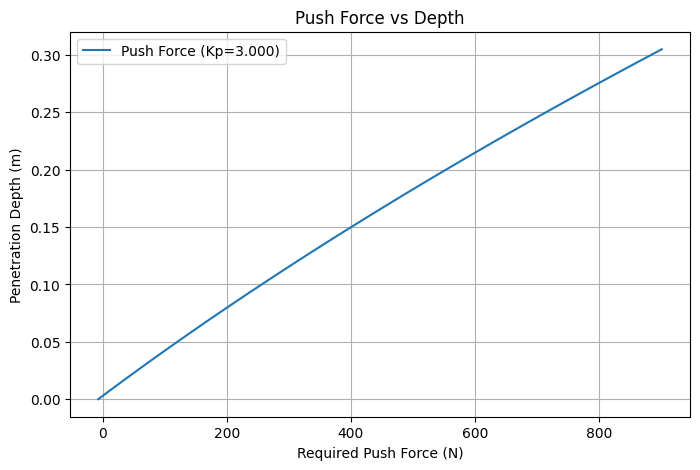

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(F_push, depths, label=f'Push Force (Kp={Kp:.3f})')
plt.xlabel('Required Push Force (N)')
plt.ylabel('Penetration Depth (m)')
plt.title('Push Force vs Depth')
plt.legend()
plt.grid()
plt.show()

In [107]:
print(f"Final Required Push Force at h={h_max}m: {F_push[-1]:.2f} N")

Final Required Push Force at h=0.30479999999999996m: 901.65 N
